<a href="https://colab.research.google.com/github/Abhishek308517/PROJECTS-/blob/main/Python_Sales_Trends_by_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')


In [7]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [8]:
# Clean Data

In [9]:
df.info() # Order Date,Ship Date need to change in date format

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.shape

(9994, 21)

In [11]:
df['Ship Date' ]=pd.to_datetime(df['Ship Date'])
df['Order Date' ]=pd.to_datetime(df['Order Date'])

In [12]:
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [13]:
df.drop(['Row ID', 'Order ID', 'Customer ID', 'Product ID'], axis=1, inplace=True)


In [14]:
df.drop_duplicates(inplace=True)


In [15]:
df.duplicated( ).sum()

np.int64(0)

In [16]:
df.isnull().sum()

,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer Name,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0


In [17]:
# EDA
# Monthly sales trends

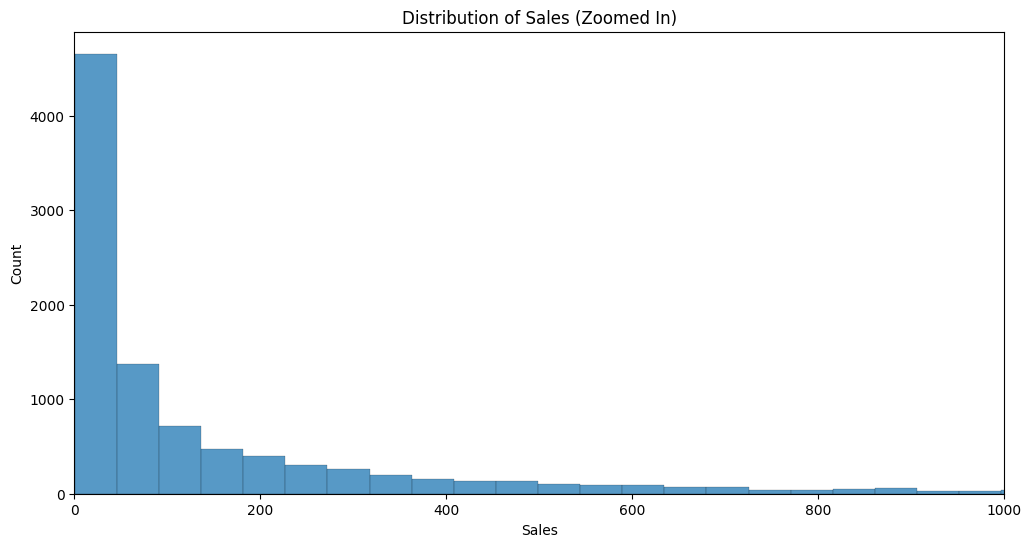

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Sales'],bins=500)
plt.xlim(0, 1000)  # Focus on range 0–1000
plt.title('Distribution of Sales (Zoomed In)')
plt.show()

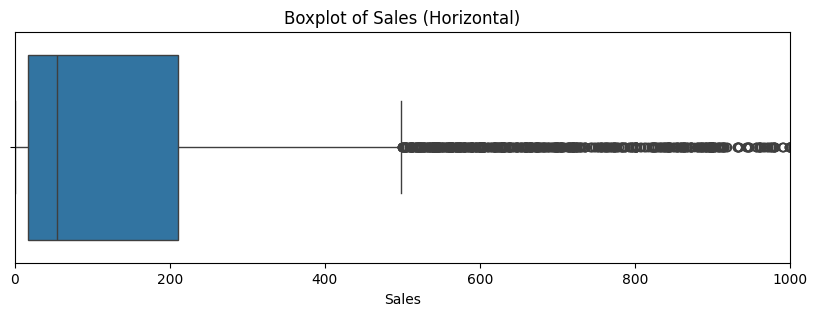

In [19]:
plt.figure(figsize=(10, 3))  # Wider and shorter figure for horizontal boxplot
sns.boxplot(x=df['Sales'])
plt.xlim(0, 1000)  # Optional: Zoom in on a specific range
plt.title('Boxplot of Sales (Horizontal)')
plt.xlabel('Sales')
plt.show()


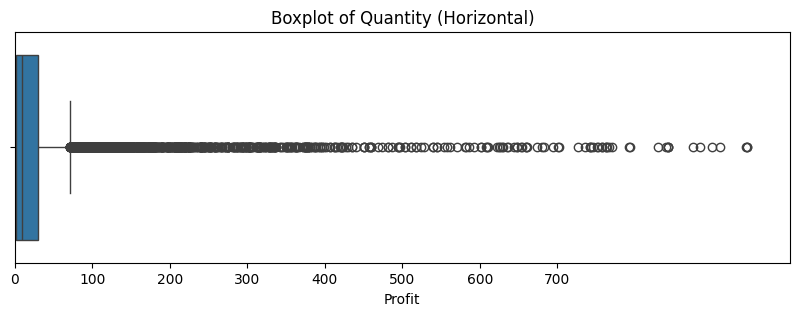

In [20]:
plt.figure(figsize=(10, 3))  # Wider and shorter figure for horizontal boxplot
sns.boxplot(x=df['Profit'])
plt.xlim(0, 1000)  # Optional: Zoom in on a specific range
plt.xticks(ticks=range(0, 800, 100))
plt.title('Boxplot of Quantity (Horizontal)')
plt.xlabel('Profit')
plt.show()

In [21]:
#Sales
Q1_Sales=  df['Sales'].quantile(0.25)
Q3_Sales = df['Sales'].quantile(0.75)
IQR_Sales = Q3_Sales-Q1_Sales
int(Q1_Sales), int(IQR_Sales),int(Q3_Sales)

(17, 192, 209)

In [22]:
# profit
Q1_Profit=  df['Profit'].quantile(0.25)
Q3_Profit= df['Profit'].quantile(0.75)
IQR_Profit = Q3_Profit-Q1_Profit
int(Q1_Profit), int(IQR_Profit),int(Q3_Profit)

(1, 27, 29)

In [23]:
Upper_Limit_Sales = Q3_Sales + 1.5*IQR_Sales
Lower_Limit_Sales = Q1_Sales- 1.5*IQR_Sales
int(Lower_Limit_Sales) ,int(Upper_Limit_Sales)

(-271, 498)

In [24]:
Upper_Limit_Profit = Q3_Profit + 1.5*IQR_Profit
Lower_Limit_Profit = Q1_Profit - 1.5*IQR_Profit
int(Lower_Limit_Profit) ,int(Upper_Limit_Profit)

(-39, 70)

In [25]:
#cap_outliers function for Sales column
def cap_outliers(Sales):
    return (Sales).clip(Upper_Limit_Sales , Lower_Limit_Sales )


In [26]:
#cap_outliers function for Profit column
def cap_outliers(Profit):
    return Profit.clip(Upper_Limit_Profit , Lower_Limit_Profit )

In [27]:
df['Sales'] = cap_outliers(df['Sales'])
df['Profit'] = cap_outliers(df['Profit'])


In [28]:
int((df['Sales'] > Upper_Limit_Sales).sum())

0

In [29]:
# Create MonthYear column
df['MonthYear'] = df['Order Date'].dt.strftime('%m/%Y')

In [30]:
df['MonthYear'].head(20);

In [31]:
monthly_sales = df.groupby('MonthYear')['Sales'].sum().reset_index()

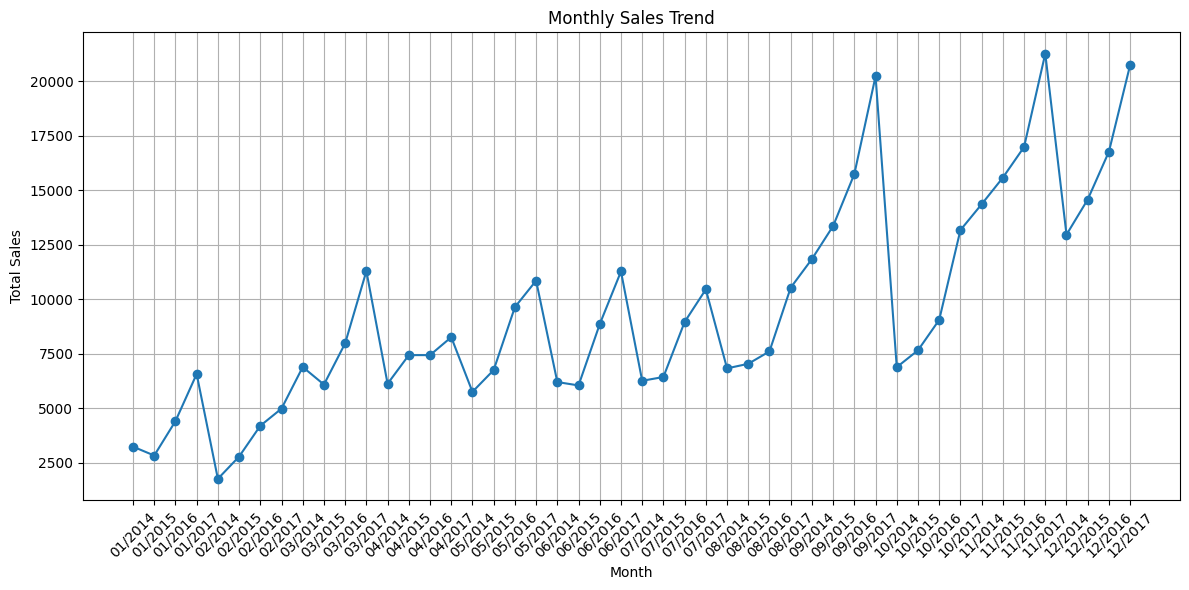

In [33]:
# Monthly Sales Trend

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['MonthYear'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()